In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [39]:
# Definir dataset 
# X: imagen
# Y: etiqueta
(x_train, y_train), (x_test, y_test) = mnist.load_data()

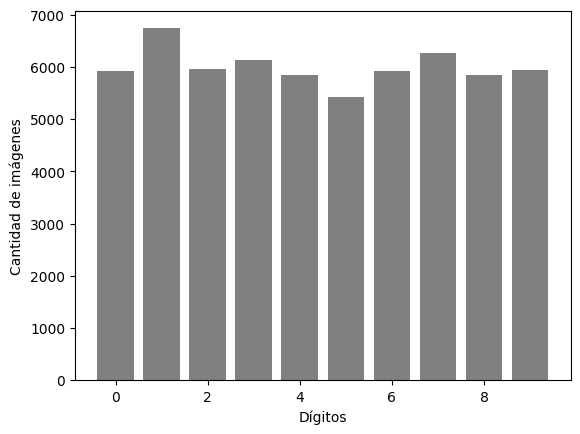

In [27]:
import numpy as np
from collections import Counter
# Distribución de etiquetas

# Contar la cantidad de imágenes por etiqueta en el conjunto de entrenamiento
label_counts = Counter(y_train)  # y_train contiene las etiquetas originales (no categóricas)

# Mostrar la distribución de etiquetas en un gráfico de barras
plt.bar(label_counts.keys(), label_counts.values(), color='grey')
plt.xlabel('Dígitos')
plt.ylabel('Cantidad de imágenes')
plt.show()


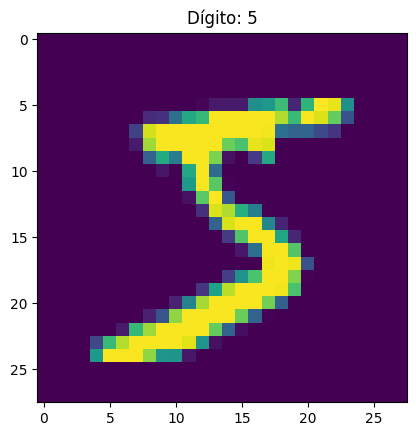

In [ ]:
# Mostremos una imagen del dataset MNIST
plt.imshow(x_train[0])  # Primera imagen 
plt.title(f"Dígito: {y_train[0]}")  # Mostrar la etiqueta correspondiente (que dígito corresponde)
plt.show()


In [40]:
# Normalizar las imágenes
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir etiquetas a formato categórico (one-hot encoding 1 - 10)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [41]:
# Definir el modelo
# función de activación: ReLU
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplana las imágenes a un vector
    Dense(128, activation='relu'),  # Capa densa con 128 neuronas 
    Dense(64, activation='relu'),   # Capa densa con 64 neuronas 
    Dense(10, activation='relu') # Capa de salida con 10 neuronas
])

c:\Users\shosi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
# Compilar el modelo
model.compile(
    optimizer='adam',               # Optimizador Adam
    loss='categorical_crossentropy',# Función de pérdida para clasificación categórica
    metrics=['accuracy']            # Métrica de evaluación: precisión
)


In [ ]:
# Entrenar el modelo
history = model.fit(
    x_train, y_train,               # Datos de entrenamiento
    validation_split=0.2,           # Usar 20% de los datos para validación (80% entrenamiento vs 20% validación)  * AFECTA EL MODELO *
    epochs=10,                      # epochs: Cantidad de veces que el modelo verá todo el dataset * AFECTA EL MODELO *
    batch_size=32,                  # Batch: Cuántas muestras procesa el modelo antes de actualizar los pesos * AFECTA EL MODELO *
    verbose=1                       # verbose: 0 (sin salida), 1 (barra de progreso), 2 (una línea por epoch) * NO AFECTA EL MODELO *
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1530 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1022 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0998 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0976 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0985 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0982 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.1009 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0980 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epo

In [10]:
# Evaluar
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Precisión en los datos de prueba: {test_acc:.2f}")

Precisión en los datos de prueba: 0.98


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


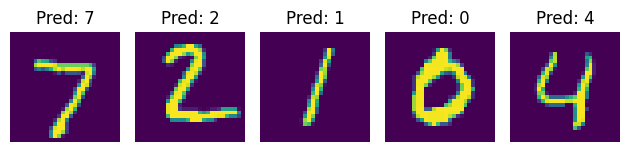

In [ ]:
# Predicciones vs Imágenes
predictions = model.predict(x_test[:5])
predicted_labels = predictions.argmax(axis=1)  # Clases más probables

for i in range(5):
    plt.subplot(1, 5, i + 1)  # Crear un subplot para cada imagen
    plt.imshow(x_test[i])  
    plt.title(f"Pred: {predicted_labels[i]}")  # Etiqueta predicha por el modelo
    plt.axis('off')  # Ocultar ejes

plt.tight_layout()  # Ajustar el diseño
plt.show()


Se dice clases mas probables porque el modelo predice un porcentaje de que tal imagen sea tal digito, no da respuesta definitiva.

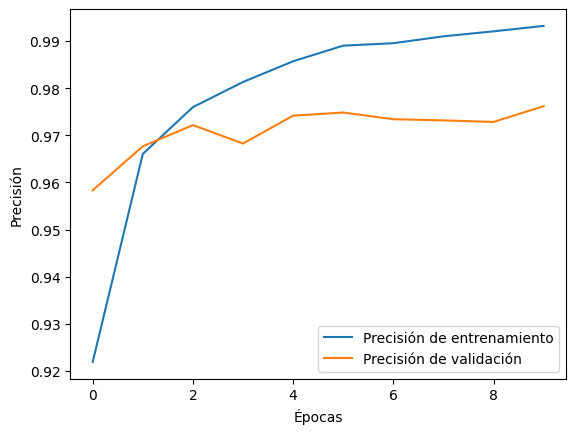

In [ ]:
# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

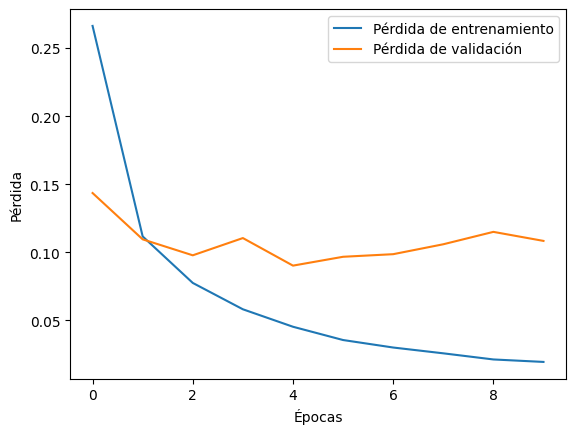

In [13]:
# Graficar pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()